# Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Getting Data

In [45]:
D = pd.read_csv("Data.csv")
D.info()
print(D)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       64 non-null     object 
 1   Price_A1   64 non-null     float64
 2   Price_A2   64 non-null     float64
 3   Price_A3   64 non-null     float64
 4   Price_A4   64 non-null     float64
 5   Price_A5   64 non-null     float64
 6   Price_A6   64 non-null     float64
 7   Price_A7   64 non-null     float64
 8   Price_A8   64 non-null     float64
 9   Price_A9   64 non-null     float64
 10  Price_A10  64 non-null     float64
dtypes: float64(10), object(1)
memory usage: 5.6+ KB
            Date  Price_A1  Price_A2  ...  Price_A8  Price_A9  Price_A10
0   Oct 01, 2021      3.80    173.94  ...    167.13    289.10     137.05
1   Oct 04, 2021      3.63    172.66  ...    166.95    283.11     135.73
2   Oct 05, 2021      3.64    174.76  ...    168.66    288.76     136.62
3   Oct 06, 2021      3.61    17

# Calaculating the mean, variance and Correralation coefficient

## Calculating the Returns

In [46]:
p = []
for i in range(1,11):
  p.append(D.iloc[:,i].values)
for i in range(len(p)):
  print("Values of Prices of asset",i+1,"are :\n",p[i],'\n')
r = []
for i in range(len(p)):
  temp1 = p[i]
  temp2 = []
  for i in range(len(temp1)-1):
    temp2.append((temp1[i+1]-temp1[i])/temp1[i])
  r.append(temp2)
for i in range(len(r)):
  print("Values of Returns of asset",i+1,"are:\n",r[i],'\n')

Values of Prices of asset 1 are :
 [3.8  3.63 3.64 3.61 3.75 3.75 3.63 3.77 3.63 3.38 3.38 3.25 3.41 3.36
 3.37 3.29 3.26 3.14 3.03 3.03 3.01 3.1  3.06 3.03 3.19 3.32 3.36 3.28
 3.69 3.21 3.09 2.85 2.85 2.88 2.68 2.81 2.77 2.69 2.77 2.64 2.7  2.69
 2.6  2.65 2.57 2.63 2.86 2.94 2.79 2.73 2.58 2.64 2.72 2.39 2.31 2.38
 2.42 2.45 2.35 2.3  2.32 2.29 2.43 2.41] 

Values of Prices of asset 2 are :
 [173.94 172.66 174.76 173.4  174.29 175.15 173.46 174.91 168.72 171.51
 175.81 176.82 177.31 179.6  177.47 187.08 182.31 180.95 178.03 174.61
 173.78 174.21 173.17 172.61 172.53 176.69 180.05 179.86 181.39 181.3
 181.89 183.13 180.92 179.61 176.21 173.54 170.9  170.85 171.61 156.82
 157.86 152.3  150.06 156.77 155.94 160.68 166.95 168.93 168.02 167.03
 163.3  162.85 162.24 163.   160.01 155.89 160.91 162.47 164.19 164.39
 164.41 163.83 164.16 163.6 ] 

Values of Prices of asset 3 are :
 [55.14 54.23 54.69 53.94 55.02 55.08 54.93 54.28 54.62 55.65 55.25 55.19
 55.74 56.2  55.69 55.11 55.14 55.81 

## Calculating Mean, Variance, and Covariance of Returns

In [47]:
e = []
v = []
for i in range(len(r)):
  e.append(np.mean(r[i])*64)
  v.append(np.var(r[i])*64)
c = np.cov(r)
c1 = np.corrcoef(r)
print("Value of Means are:\n",e,"\nValues of Number of asserts are:\n",len(e))
print("Value of Variances are:\n",v,"\nValues of Number of asserts are:\n",len(v))
print("Covariance Matrix is:\n",c)

Value of Means are:
 [-0.4004642390899367, -0.04897259750968475, 0.14797898349625918, -0.12179969554986257, -0.7229687603661908, -0.061448514852768886, -0.03232706609778926, -0.050225621189254874, 0.160178557992927, 0.05894697924088129] 
Values of Number of asserts are:
 10
Value of Variances are:
 [0.11952979671502074, 0.026226726333513518, 0.012941260318370857, 0.015660737106076683, 0.175850849076146, 0.01810934372695878, 0.025243726805343866, 0.009125226125904207, 0.012637493063916861, 0.00759549495633981] 
Values of Number of asserts are:
 10
Covariance Matrix is:
 [[ 1.89777651e-03  2.38413530e-04  1.00389896e-04  3.46863389e-04
   4.35016046e-04 -3.82018796e-05  1.67720948e-04  3.66415480e-05
   5.04991002e-05  2.76389264e-05]
 [ 2.38413530e-04  4.16402157e-04  8.06288737e-05  1.35875220e-04
   2.13488124e-04  8.53734459e-05  4.00279310e-05  1.62695023e-04
   7.30204083e-05  3.11446207e-05]
 [ 1.00389896e-04  8.06288737e-05  2.05468599e-04  7.57252734e-05
   2.11724835e-05  6.187

## Randomly Generating Weights and plotting Sigma square vs Mu 

In [48]:
mu_t = []
sig_t = []
port_w = []
n_port = 5000
for i in range(n_port):
  w = np.random.random(10)
  w = w/np.sum(w)
  port_w.append(w)
  mu_t.append(np.matmul(np.transpose(w),e))
  sig_t.append(np.matmul(np.matmul(w,c),np.transpose(w)))
print(mu_t)
print(sig_t)

[-0.12040694937067507, -0.11124807186067484, -0.10268959464811629, -0.11736499103996251, -0.140858038458142, -0.15904031345783307, -0.03540067023155938, -0.0004156943072435553, -0.05624512524494966, -0.15241353087080353, -0.05184179426417084, -0.13683089578819196, -0.12976069743765534, -0.08124087763867373, -0.10531927140176706, -0.13641982057288513, -0.1497262546489097, -0.17597867192410344, -0.10181666345660911, -0.0970249462509005, -0.0363399494226251, -0.0966209340703119, -0.13056507996622704, -0.11755260385867335, -0.12444230790800055, -0.100697129549832, -0.06944806833912581, -0.0045576387303049685, 0.004288613437350486, -0.1432724852908989, -0.1871799427876897, -0.07647078530354776, -0.029826224006638667, -0.19702218898675627, -0.1205571628086789, -0.060688192555471275, -0.12385278979789457, -0.13226095311733232, -0.07471576845537894, -0.05935826949800355, -0.09647033141032282, -0.10780149288134507, -0.0476615356546678, -0.020759003273191343, -0.13789447223395182, -0.04619102759

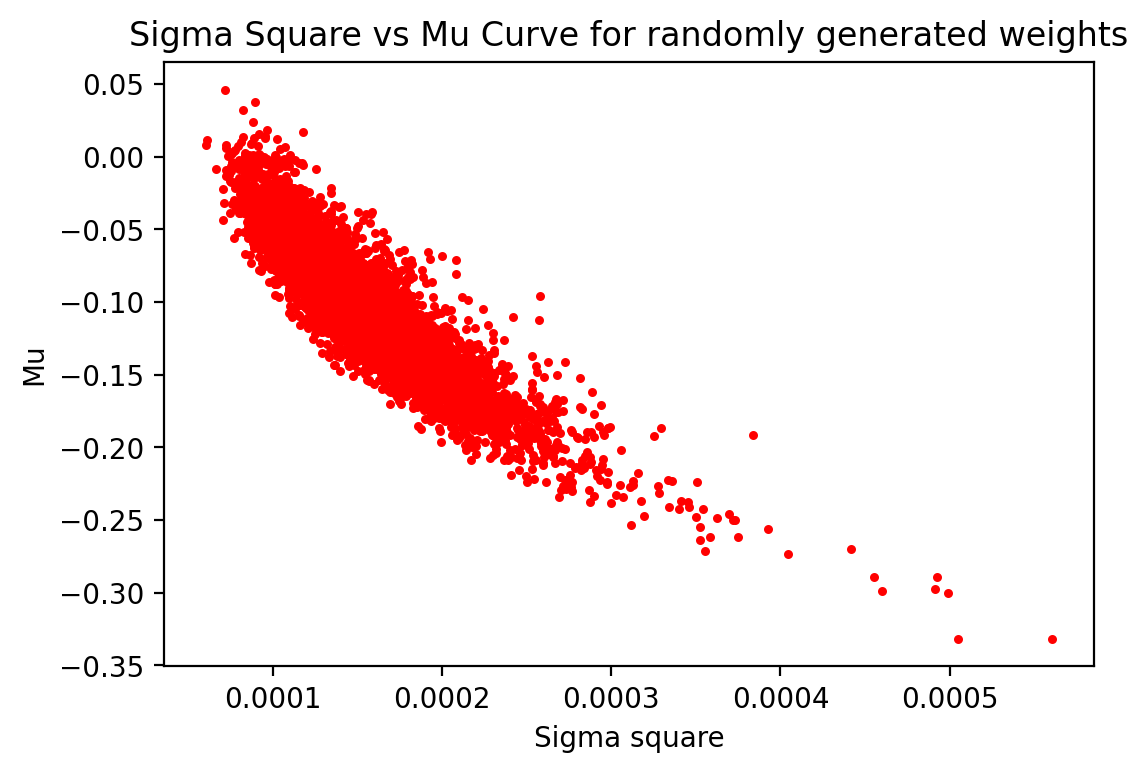

In [49]:
plt.figure(dpi=200)
plt.scatter(sig_t,mu_t,marker='o',color='r',s=5)
plt.xlabel("Sigma square")
plt.ylabel("Mu")
plt.title("Sigma Square vs Mu Curve for randomly generated weights")
plt.show()

## Calculating Weights for Effiecient Frontier and plotting the frontier

In [50]:
i = np.linalg.inv(c)
print("Inverse of Covariance Matrix is : \n",i)
o = [1,1,1,1,1,1,1,1,1,1]
mu = -1
sig = [] 
a1 = np.matmul(np.matmul(o,i),np.transpose(o))
b1 = np.matmul(np.matmul(o,i),np.transpose(e))
a2 = np.matmul(np.matmul(e,i),np.transpose(o))
b2 = np.matmul(np.matmul(e,i),np.transpose(e))
print("Value of a1 is:\n",a1)
print("Value of b1 is:\n",b1)
print("Value of a2 is:\n",a2)
print("Value of b2 is:\n",b2)
x = np.matmul(o,i)
y = np.matmul(e,i)
print("Value of Inverse * O is:\n",x)
print("Value of Inverse * M is:\n",y)
p_w = []
s = []
m= []
iterations = 200
for i in range(iterations):
  weights = ((mu*b1-b2)*x+(a2-mu*a1)*y)/(a1*b2-a2*b1)
  weights = weights/np.sum(weights)
  p_w.append(weights)
  m.append(mu)
  s.append(np.matmul(np.matmul(weights,c),np.transpose(weights)))
  mu = mu + 0.01
for i in range(iterations):
  print("For Expected mean with ",m[i]," Risk is ",s[i],"\nWith Weights",p_w[i],"\n")

Inverse of Covariance Matrix is : 
 [[ 7.81145962e+02 -4.49832353e+02 -1.96973177e+02 -9.75894763e+02
  -4.87168517e+01  3.38144542e+02 -1.34655790e+02  7.07506405e+02
   3.57489050e+02 -1.51963104e+02]
 [-4.49832353e+02  6.07935137e+03  5.64025027e+02 -1.36974484e+03
  -2.56424912e+02 -7.24247743e+02  1.45708570e+03 -6.63438863e+03
  -2.43857250e+03  1.03155589e+03]
 [-1.96973177e+02  5.64025027e+02  7.36079456e+03 -7.10560771e+02
   9.71640643e+01 -1.18050474e+03 -7.96101780e+02 -2.49269441e+03
  -2.30034318e+03  1.87037794e+01]
 [-9.75894763e+02 -1.36974484e+03 -7.10560771e+02  7.16789321e+03
  -4.48439439e+01 -5.14584401e+02 -1.40615221e+03 -4.28295237e+01
   1.31421640e+02 -2.07213404e+02]
 [-4.87168517e+01 -2.56424912e+02  9.71640643e+01 -4.48439439e+01
   3.90255743e+02  2.05947895e+00 -1.07252317e+02  2.41110834e+02
  -3.00671862e+01  1.34815426e+01]
 [ 3.38144542e+02 -7.24247743e+02 -1.18050474e+03 -5.14584401e+02
   2.05947895e+00  4.54114752e+03 -4.72483373e+02 -7.96525377e+

## Plotting Mu and Sigma^2

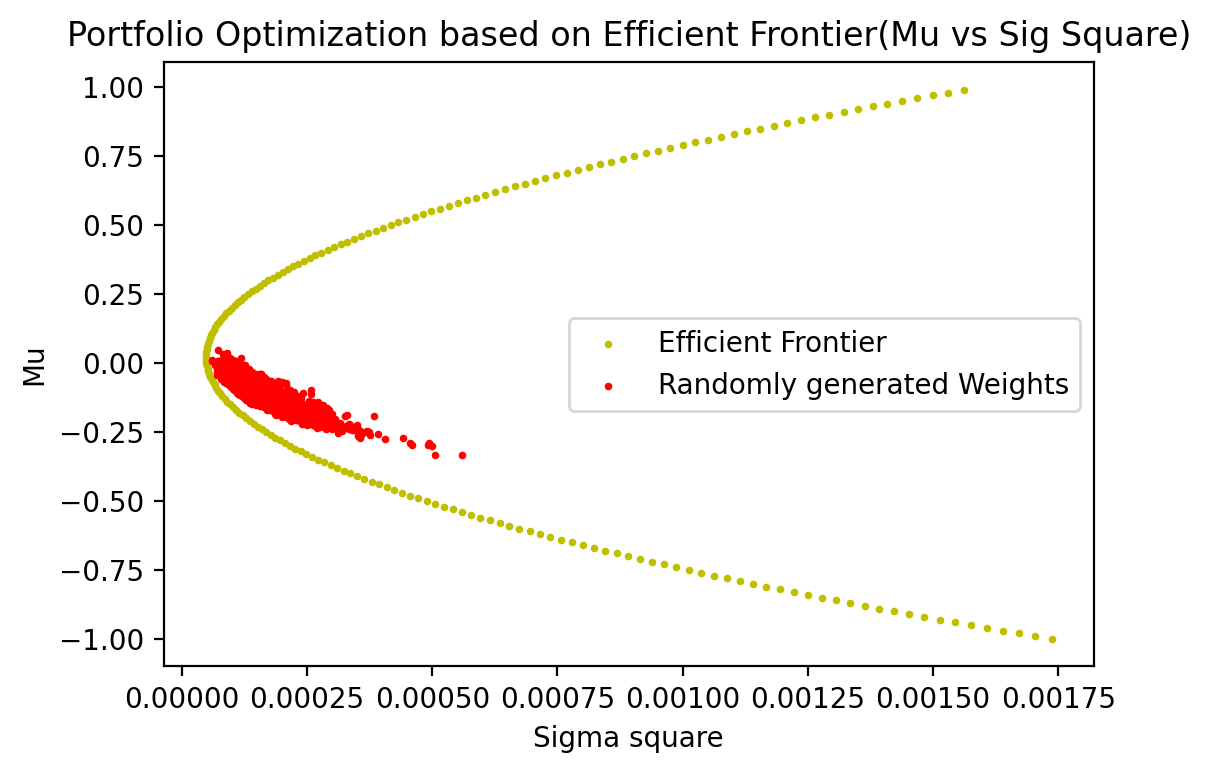

In [51]:
plt.figure(dpi=200)
plt.scatter(s,m,marker='o',color='y',s=3)
plt.scatter(sig_t,mu_t,marker='o',color='r',s=3)
plt.xlabel("Sigma square")
plt.ylabel("Mu")
plt.title("Portfolio Optimization based on Efficient Frontier(Mu vs Sig Square)")
plt.legend(["Efficient Frontier","Randomly generated Weights"])
plt.show()

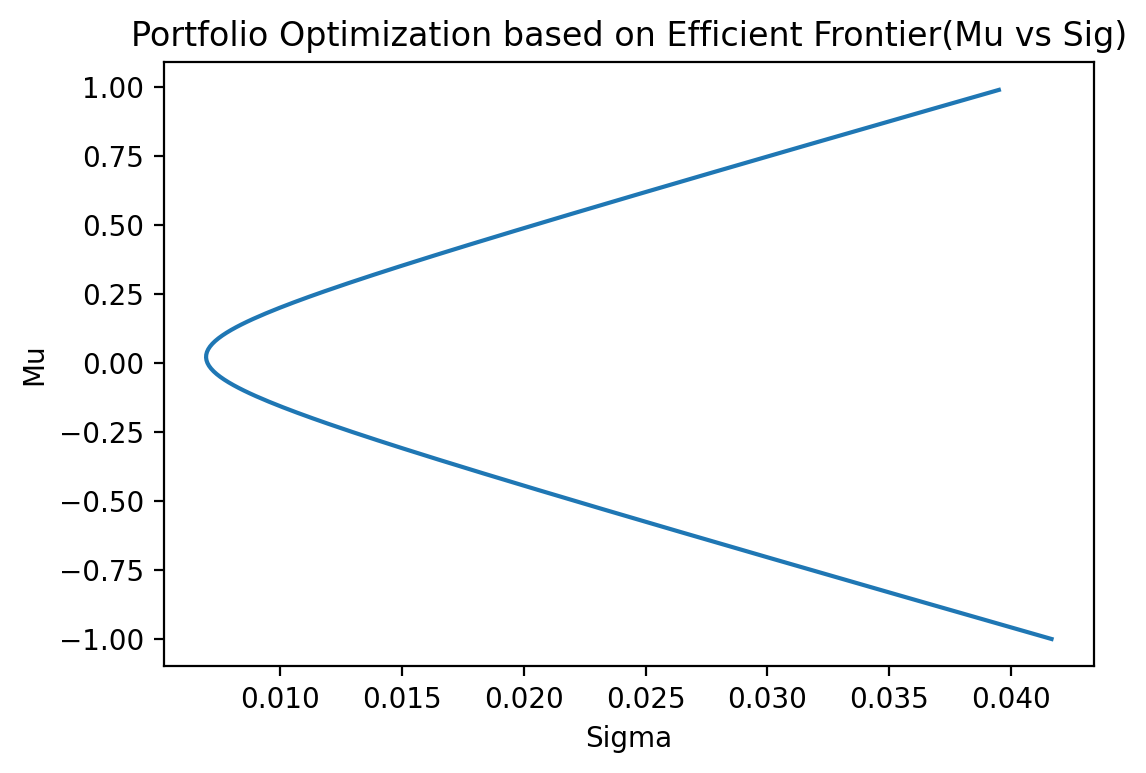

In [52]:
plt.figure(dpi=200)
plt.plot(np.sqrt(s),m)
plt.xlabel("Sigma")
plt.ylabel("Mu")
plt.title("Portfolio Optimization based on Efficient Frontier(Mu vs Sig)")
plt.show()

## Getting the minimum risk Risky asset portfolio 

In [53]:
index_r = s.index(min(s))
print("Optimised Risky Portfoliois:\n")
for i in range(len(p_w[index_r])):
  print("For Asset",i+1,"Weight Associated is:",p_w[index_r][i],'\n')
print("For this portfolio the Expected Return is:",s[index_r],'\n')
print("For this Portfolio the Risk assciated is:",m[index_r])


Optimised Risky Portfoliois:

For Asset 1 Weight Associated is: 0.01158760874285754 

For Asset 2 Weight Associated is: -0.133908298882596 

For Asset 3 Weight Associated is: 0.013813375436387122 

For Asset 4 Weight Associated is: 0.09965644129341936 

For Asset 5 Weight Associated is: 0.013339869714147867 

For Asset 6 Weight Associated is: 0.19035653221641802 

For Asset 7 Weight Associated is: -0.03516734920789496 

For Asset 8 Weight Associated is: 0.24647538462678323 

For Asset 9 Weight Associated is: 0.25441788789804876 

For Asset 10 Weight Associated is: 0.3394285481624292 

For this portfolio the Expected Return is: 4.834073714862045e-05 

For this Portfolio the Risk assciated is: 0.020000000000000753


## CAP-M Model

## Calculating W* here Mu risk free is selected for as bond

In [54]:
inverse = np.linalg.inv(c)
mrf = 0.02
o = [1,1,1,1,1,1,1,1,1,1]
m1 = e
t1 = m1-np.dot(mrf,o)
t2 = np.matmul(t1,inverse)
#print(m1,'\n',t1,'\n',t2)
t3 = m1-np.dot(mrf,o)
t4 = np.matmul(np.matmul(t3,inverse),np.transpose(o))
#print(t3,'\n',t4)
wder = t2/t4
print("Value of W* is:",wder,"\nSum of W* is:",np.sum(wder))                 

Value of W* is: [ -3.63529371   7.80687796  21.00599084  -9.19849205  -5.18363562
  -4.30841533  -3.32001875 -23.24242689  11.07449756  10.00091599] 
Sum of W* is: 1.0000000000000018


## Calculating Mud_er and Sigma_der

In [55]:
mder = np.matmul(e,np.transpose(wder))
print("Value of Mu_der is:",mder) 
sigder =  np.sqrt(np.matmul(wder,np.matmul(c,np.transpose(wder))))
print("Value of Sigma_der is:",sigder) 

Value of Mu_der is: 12.952765710848425
Value of Sigma_der is: 0.5197515503079597


## Plotting Effiecient Frontier and CAP-M model which is tangent to Efficient Frontier

In [56]:
t = 100
er = mrf
step = 1/t
mu_rf = []
sig_rf = [] 
wrisky = [] 
for i in range(t):
  mu_rf.append(er)
  sig_rf.append((er-mrf)/(mder-mrf)*sigder)
  wrisky.append((er-mrf)/(mder-mrf))
  '''
  weights = ((er*b1-b2)*x+(a2-er*a1)*y)/(a1*b2-a2*b1)
  weights = weights/np.sum(weights)
  p_w.append(weights)
  m.append(er)
  s.append(np.matmul(np.matmul(weights,c),np.transpose(weights)))
  '''
  er = er + step
'''  
print(mu_rf)
print(sig_rf)
print(wrisky)
print(s)
print(m)
'''

'  \nprint(mu_rf)\nprint(sig_rf)\nprint(wrisky)\nprint(s)\nprint(m)\n'

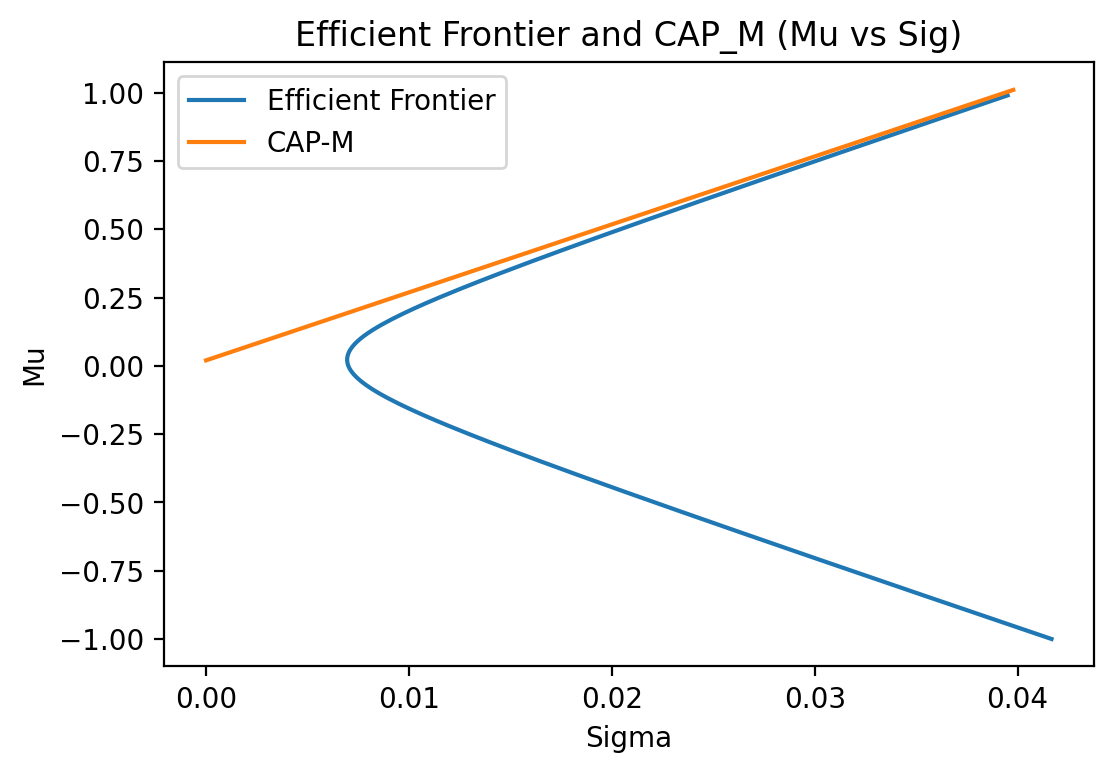

In [57]:
plt.figure(dpi=200)
plt.plot(np.sqrt(s),m)
plt.plot(sig_rf,mu_rf)
plt.xlabel("Sigma")
plt.ylabel("Mu")
plt.title("Efficient Frontier and CAP_M (Mu vs Sig)")
plt.legend(["Efficient Frontier","CAP-M"])
plt.show()

## Getting Optimum Risky and Risk free portfolio

In [58]:
e_return = 0.4 
wrisky = (e_return-mrf)/(mder-mrf)
wrf = 1 - wrisky
w_r = wder*wrisky
s_r = sigder*wrisky*wrisky
print("For the portfolio:\n\nThe Expected return is considered as",e_return,'\n')
for i in range(len(w_r)):
  print("For Risky Asset",i+1,"Weight associated is:",w_r[i],'\n')
print("For Risk free Asset Weight associated is:",wrf,'\n')
print("For Risk free the expected return is:",mrf,'\n')
print("For the portfolio the risk associated is",s_r)

For the portfolio:

The Expected return is considered as 0.4 

For Risky Asset 1 Weight associated is: -0.10681486383146771 

For Risky Asset 2 Weight associated is: 0.22938740951905634 

For Risky Asset 3 Weight associated is: 0.6172134172220903 

For Risky Asset 4 Weight associated is: -0.27027683473423475 

For Risky Asset 5 Weight associated is: -0.15230938062377583 

For Risky Asset 6 Weight associated is: -0.1265930167035024 

For Risky Asset 7 Weight associated is: -0.09755122387642884 

For Risky Asset 8 Weight associated is: -0.6829260203154535 

For Risky Asset 9 Weight associated is: 0.32539900329174826 

For Risky Asset 10 Weight associated is: 0.29385424291020307 

For Risk free Asset Weight associated is: 0.9706172671417651 

For Risk free the expected return is: 0.02 

For the portfolio the risk associated is 0.00044872489711662286


# For SML's taking 3 random assets and plotting the sml's for them

In [59]:
k =[]
for i in range(3):
  k.append(int(input("Enter Asset value between 0 and 9\n")))
m_asset = []
m_der = []
for x in k:
  c_k = []
  for i in range(c.shape[0]):
    c_k.append(c[i][x])
  cov_k = np.matmul(c_k,np.transpose(wder))
  beta = cov_k/s_r
  print("Beta for",x,"Asset is:",beta,'\n')
  t = 100
  step = 1/t
  mu_m1 = []
  mu_mk = []
  m1 = 0
  for i in range(t):
    m2 = mrf + beta*(m1-mrf)
    mu_m1.append(m1)
    mu_mk.append(m2)
    m1 = m1 + step
  m_asset.append(mu_m1)
  m_der.append(mu_mk)

Enter Asset value between 0 and 9
9
Enter Asset value between 0 and 9
8
Enter Asset value between 0 and 9
6
Beta for 9 Asset is: 1.8129832397901238 

Beta for 8 Asset is: 6.525316755563961 

Beta for 6 Asset is: -2.435826748871504 



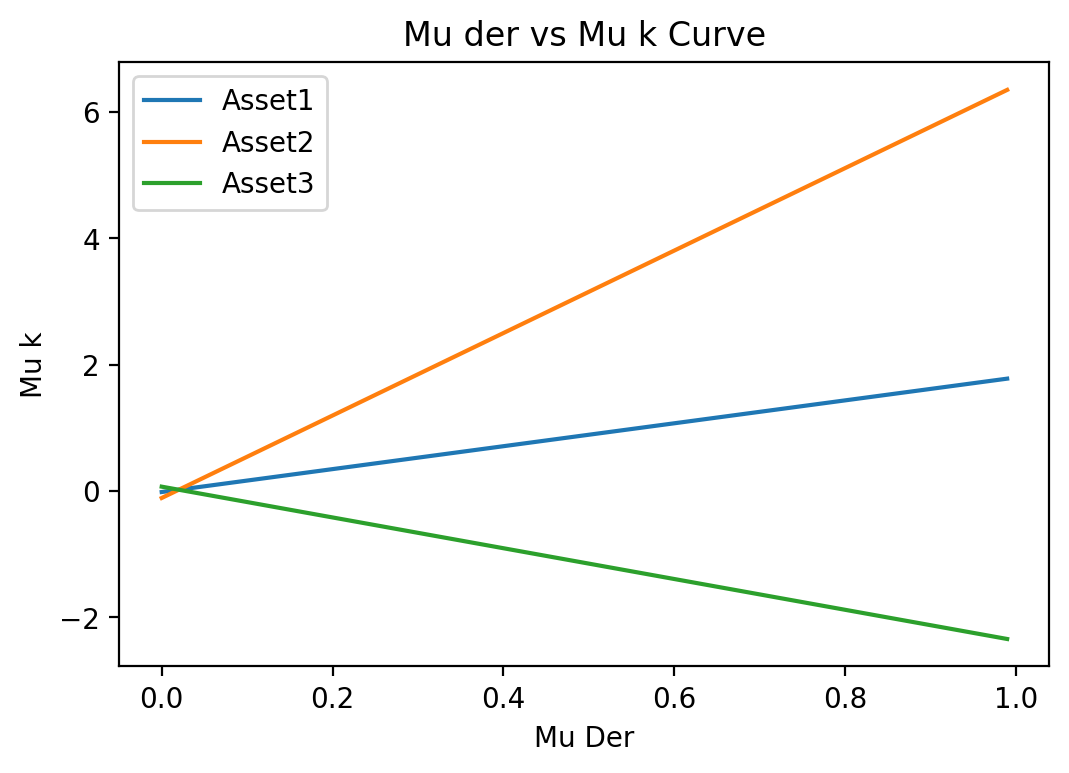

In [60]:
plt.figure(dpi=200)
plt.plot(m_asset[0],m_der[0])
plt.plot(m_asset[1],m_der[1])
plt.plot(m_asset[2],m_der[2])
plt.xlabel("Mu Der")
plt.ylabel("Mu k")
plt.title("Mu der vs Mu k Curve")
plt.legend(['Asset1','Asset2','Asset3'])
plt.show()